In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semeval3/train2.csv
/kaggle/input/semeval1/lan_df_5_new.csv
/kaggle/input/lan-test/lan_df_test
/kaggle/input/semeval/train.csv


In [1]:
!pip install pygtrans -i https://pypi.org/simple

In [2]:
from pygtrans import Translate, Null
from random import sample
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# 加载数据集
train_df = pd.read_csv("/kaggle/input/semeval/train.csv")
lan_df_test = pd.read_csv("/kaggle/input/lan-test/lan_df_test") # 翻译成测试集其余4种语言后的数据
train2_df = pd.read_csv("/kaggle/input/semeval3/train2.csv") # 是增强后的训练集数据

In [9]:
# 加载翻译client
client = Translate()
# text = client.translate('不大的，只是视频显得突出了啦', target = 'en')
# print(text.translatedText)  # 谷歌翻译

In [5]:
# 训练集中语言名称与简称的映射转换
language = list(train_df.groupby('language').groups.keys())
#print(language)
tar_lan = ['zh-CN','en','fr','it','pt','es'] # tar_lan中每个元素是str类型
lan_map = dict(zip(language, tar_lan))
re_map = dict(zip(tar_lan, language))
# print(lan_map)
# print(re_map)
# print(sample(tar_lan,3))

In [ ]:
# 测试集中4种语言名称与简称的映射转换
test_language = {'Hindi','Arabic','Dutch','Korean'}
tar_lan_test = {'hi','ar','nl','ko'}
map_test = dict(zip(test_language,tar_lan_test))
re_map_test = dict(zip(tar_lan_test,test_language))

In [12]:
# 数据可视化
#train_df
#lan_df_test
train2_df
#train_df[(train_df['label']>3)]
#a = lan_df_a1[lan_df_a1['text'].notna()]
#print(range(lan_df_a1.shape[0]))
#lan_df_a2 = lan_df_a1.sample(2)

,Unnamed: 0,text,label,language
0,0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,1,Bees vs. Wasps. http,1.0,English
2,2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,4,I can be having a perfectly good day then I th...,1.6,English
...,...,...,...,...
15063,15063,@user @user have you ever shaved,3.8,English
15064,15064,@user @user vous êtes-vous déjà rasé,3.8,French
15065,15065,@utente @utente ti sei mai rasato,3.8,Italian
15066,15066,@user @user você já se depilou,3.8,Portuguese


In [ ]:
# 分层随机选出label值大于3.3的样本，组成dataframe
lan_df_3 = train_df[(train_df['label']>=3.3) & (train_df['label']<4.0)] #3-4 
lan_df_4 = train_df[(train_df['label']>=4.0) & (train_df['label']<=5.0)] #4-5 
#lan_df_3 = lan_df_3.sample(300)
lan_df_3

In [6]:
# 分层随机选出label值大于3.3的样本，组成dataframe
lan_df_1 = train_df[(train_df['label']>=1.8) & (train_df['label']<2.6)] #1-2 
lan_df_1 = lan_df_1.sample(400)  # 2
lan_df_2 = train_df[(train_df['label']>=2.6) & (train_df['label']<=3.0)] #2-3  2
lan_df_2 = lan_df_2.sample(550)  # 2
lan_df_3 = train_df[(train_df['label']>=3) & (train_df['label']<3.4)] #3
lan_df_3 = lan_df_3.sample(350)  # 2
lan_df_4 = train_df[(train_df['label']>=3.4) & (train_df['label']<=3.8)] #3-4  4
lan_df_4 = lan_df_4.sample(400)  # 2
lan_df_5 = train_df[(train_df['label']>=3.8)] #4-5 全部
lan_df_a1 = pd.concat([lan_df_1,lan_df_2], axis=0).reset_index(drop=True)
lan_df_a1 = pd.concat([lan_df_a1,lan_df_3], axis=0).reset_index(drop=True)
lan_df_a1 = pd.concat([lan_df_a1,lan_df_4], axis=0).reset_index(drop=True)

In [14]:
# 对label小于3.8的数据做增强
lan_df_4_new = pd.DataFrame(columns=['text', 'label', 'language'])
for i in range(lan_df_4.shape[0]): # i表示行数
    #print(lan_df[i:i+1])
    src = lan_df_4[i:i+1]['language']
    #print(type(src.values[0]))
    #print(i)
    for item in sample(tar_lan,2):
#         print(item) # item是str类型，表示当前所选目标语言
#         print(lan_map[src.values[0]]) # lan_map[src.values[0]]是str类型，lan_map是将language映射到简称
#         print(lan_map[src.values[0]] is not item)  
        if lan_map[src.values[0]] is not item:
            #print(item)
            tr = client.translate(lan_df_4[i:i+1]['text'].values[0], target = item)
            if isinstance(tr, Null):
                print(f'第{i}行{item}语言翻译失败')
                continue
            else:
                text = str(tr.translatedText)
                #print(text) # text为str类型
                aug_data = pd.DataFrame(columns=['text', 'label', 'language'])
                aug_data['text'] = pd.Series(text) # 赋值赋不进去？
                #print(aug_data['text'])
                #print(lan_df[i:i+1]['label'])
                aug_data['label'] = lan_df_4[i:i+1]['label'].values[0] #要加上.values[0]才能成功赋值
                aug_data['language'] = pd.Series(re_map[item])
                lan_df_4_new = pd.concat([lan_df_4_new,aug_data],axis=0).reset_index(drop = True)
lan_df_4_new.to_csv("/kaggle/working/lan_df_4_new.csv")

In [8]:
# 对label大于3.8的数据做增强
lan_df_5_new = pd.DataFrame(columns=['text', 'label', 'language'])
for i in range(lan_df_5.shape[0]): # i表示行数
    #print(lan_df[i:i+1])
    src = lan_df_5[i:i+1]['language']
    #print(type(src.values[0]))
    #print(i)
    for item in tar_lan:
#         print(item) # item是str类型，表示当前所选目标语言
#         print(lan_map[src.values[0]]) # lan_map[src.values[0]]是str类型，lan_map是将language映射到简称
#         print(lan_map[src.values[0]] is not item)  
        if lan_map[src.values[0]] is not item:
            #print(item)
            text = str(client.translate(lan_df_5[i:i+1]['text'].values[0], target = item).translatedText)
            #print(text) # text为str类型
            aug_data = pd.DataFrame(columns=['text', 'label', 'language'])
            aug_data['text'] = pd.Series(text) # 赋值赋不进去？
            #print(aug_data['text'])
            #print(lan_df[i:i+1]['label'])
            aug_data['label'] = lan_df_5[i:i+1]['label'].values[0] #要加上.values[0]才能成功赋值
            aug_data['language'] = pd.Series(re_map[item])
            lan_df_5_new = pd.concat([lan_df_5_new,aug_data],axis=0).reset_index(drop = True)
lan_df_5_new.to_csv("/kaggle/working/lan_df_5_new.csv")

In [21]:
# 对增强数据进行合并
# lan_df_1to4_new = pd.concat([lan_df_1_new,lan_df_2_new], axis=0).reset_index(drop=True)
# lan_df_1to4_new = pd.concat([lan_df_1to4_new,lan_df_3_new], axis=0).reset_index(drop=True)
# lan_df_1to4_new = pd.concat([lan_df_1to4_new,lan_df_4_new], axis=0).reset_index(drop=True)
#train2.drop(columns='Unnamed: 0')
# train2 = pd.concat([lan_df_1to4_new,lan_df_5_new], axis=0).reset_index(drop=True)
#train2 = pd.concat([train_df,train2], axis=0).reset_index(drop=True)
#train2 = train2.drop(columns='Unnamed: 0')
#train_and_test_df = pd.concat([train2_df,lan_df_test], axis=0).reset_index(drop=True)
train_and_test_df.to_csv("/kaggle/working/train_and_test_df.csv")

In [ ]:
# 文本数据清洗，尤其是翻译后的文本，有一些标点符号是以文本字符表现出来的，如&39;。
# lan_df_1to4_new['text'] = lan_df_1to4_new.text.str.replace('#8425',".")
#res = lan_df_5_new[(lan_df_5_new['text'].str.contains("&")) & (lan_df_5_new['language']=='English')]
res = lan_df_1to4_new[(lan_df_1to4_new['text'].str.contains("&"))]
res['text'].values
#res
#lan_df_5_new

(array([2324., 1790., 1691., 1572., 1477., 2118., 1600.,  780., 1140.,
         576.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

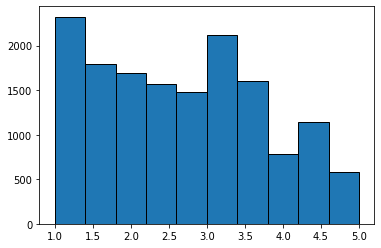

In [15]:
plt.hist(train2_df.label, edgecolor = "black")

(array([ 600.,  600.,  800.,  797.,  800.,  896., 1056.,  520.,  758.,
         384.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

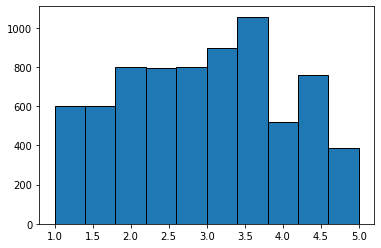

In [16]:
plt.hist(lan_df_test.label, edgecolor = "black")

(array([2924., 2390., 2491., 2369., 2277., 3014., 2656., 1300., 1898.,
         960.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

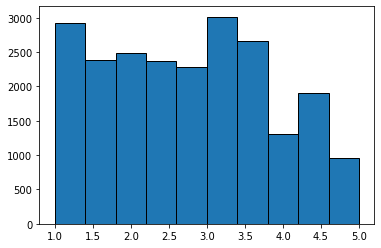

In [18]:
plt.hist(train_and_test_df.label, edgecolor = "black")

(array([2572., 2468., 2494., 2534., 2549., 2451., 1803., 1803., 1802.,
        1803.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

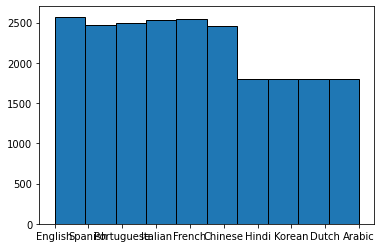

In [19]:
plt.hist(train_and_test_df.language, edgecolor = "black")

In [4]:
# 选出需要翻译成测试集的4种语言的样本。
# 为了保证语言分布均衡，4种语言各需要2000个样本，因此需要选出2000条数据。
# 按照label的比例选出数据。
# 需要2500条
lan_df_1 = train_df[(train_df['label']>=1) & (train_df['label']<1.4)] #1-2 
lan_df_1 = lan_df_1.sample(150)  # 2
lan_df_2 = train_df[(train_df['label']>=1.4) & (train_df['label']<1.8)] #2-3  2
lan_df_2 = lan_df_2.sample(150)  # 2
lan_df_3 = train_df[((train_df['label']>=1.8) & (train_df['label']<2.6))] #3
lan_df_3 = lan_df_3.sample(400)  # 2
lan_df_4 = train_df[((train_df['label']>=2.6) & (train_df['label']<3))] #3
lan_df_4 = lan_df_4.sample(200)  # 2
lan_df_5 = train_df[(train_df['label']>=3) & (train_df['label']<3.4)] #3-4  4
lan_df_5 = lan_df_5.sample(150)  # 2
lan_df_6 = train_df[(train_df['label']>=3.4) & (train_df['label']<3.8)] #3-4  4
lan_df_6 = lan_df_6.sample(200)  # 2
lan_df_7 = train_df[(train_df['label']>=3.8)] #4-5 全部 大概400条

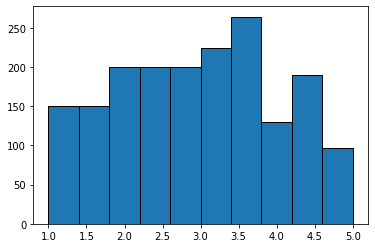

In [8]:
#lan_df_test
# lan_df_test = pd.concat([lan_df_1,lan_df_2], axis=0).reset_index(drop=True)
# lan_df_test = pd.concat([lan_df_test,lan_df_3], axis=0).reset_index(drop=True)
# lan_df_test = pd.concat([lan_df_test,lan_df_4], axis=0).reset_index(drop=True)
# lan_df_test = pd.concat([lan_df_test,lan_df_5], axis=0).reset_index(drop=True)
# lan_df_test = pd.concat([lan_df_test,lan_df_6], axis=0).reset_index(drop=True)
# lan_df_test = pd.concat([lan_df_test,lan_df_7], axis=0).reset_index(drop=True)
plt.hist(lan_df_test.label, edgecolor = "black")
# lan = lan_df_test.sample(2)

In [21]:
# 翻译成测试集的4种语言
lan_df_test_new = pd.DataFrame(columns=['text', 'label', 'language'])
for i in range(lan_df_test.shape[0]): # i表示行数
    #print(lan_df[i:i+1])
    src = lan_df_test[i:i+1]['language']
    for item in tar_lan_test:
        tr = client.translate(lan_df_test[i:i+1]['text'].values[0], target = item)
        if isinstance(tr, Null):
            print(f'第{i}行{item}语言翻译失败')
            continue
        else:
            text = str(tr.translatedText)
            aug_data = pd.DataFrame(columns=['text', 'label', 'language'])
            aug_data['text'] = pd.Series(text) # 赋值赋不进去？
            aug_data['label'] = lan_df_test[i:i+1]['label'].values[0] #要加上.values[0]才能成功赋值
            aug_data['language'] = pd.Series(re_map_test[item])
            lan_df_test_new = pd.concat([lan_df_test_new,aug_data],axis=0).reset_index(drop = True)
#lan_df_test_new.to_csv("/kaggle/working/test_aug.csv")

第314行翻译失败
第314行翻译失败
第315行翻译失败
第1298行翻译失败
第1437行翻译失败


(array([1803.,    0.,    0., 1803.,    0.,    0., 1802.,    0.,    0.,
        1803.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

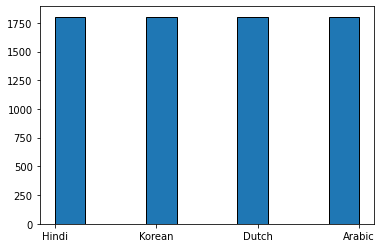

In [29]:
#lan_df_test_new.to_csv("/kaggle/working/lan_df_test")
#lan_df_test_new
#plt.hist(lan_df_test_new.label, edgecolor = "black")
plt.hist(lan_df_test_new.language, edgecolor = "black")